# ***Market Segmentation***

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('social_marketing.csv')
data.head()

Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 37 columns]

In [ ]:
# Rename the 'Unnamed: 0' column to 'user_id' for better clarity
data.rename(columns={'Unnamed: 0': 'user_id'}, inplace=True)

# Perform basic statistics to understand the data distribution
summary_stats = data.describe().transpose()

# Check for any missing values
missing_values = data.isnull().sum()

summary_stats, missing_values


(                   count      mean       std  min  25%  50%  75%   max
 chatter           7882.0  4.398757  3.529126  0.0  2.0  3.0  6.0  26.0
 current_events    7882.0  1.526262  1.268890  0.0  1.0  1.0  2.0   8.0
 travel            7882.0  1.585004  2.285530  0.0  0.0  1.0  2.0  26.0
 photo_sharing     7882.0  2.696777  2.731510  0.0  1.0  2.0  4.0  21.0
 uncategorized     7882.0  0.812992  0.935853  0.0  0.0  1.0  1.0   9.0
 tv_film           7882.0  1.070287  1.658783  0.0  0.0  1.0  1.0  17.0
 sports_fandom     7882.0  1.594012  2.160917  0.0  0.0  1.0  2.0  20.0
 politics          7882.0  1.788632  3.031113  0.0  0.0  1.0  2.0  37.0
 food              7882.0  1.397488  1.775557  0.0  0.0  1.0  2.0  16.0
 family            7882.0  0.863867  1.132562  0.0  0.0  1.0  1.0  10.0
 home_and_garden   7882.0  0.520680  0.736691  0.0  0.0  0.0  1.0   5.0
 music             7882.0  0.679269  1.030015  0.0  0.0  0.0  1.0  13.0
 news              7882.0  1.205532  2.100780  0.0  0.0  0.0  1.

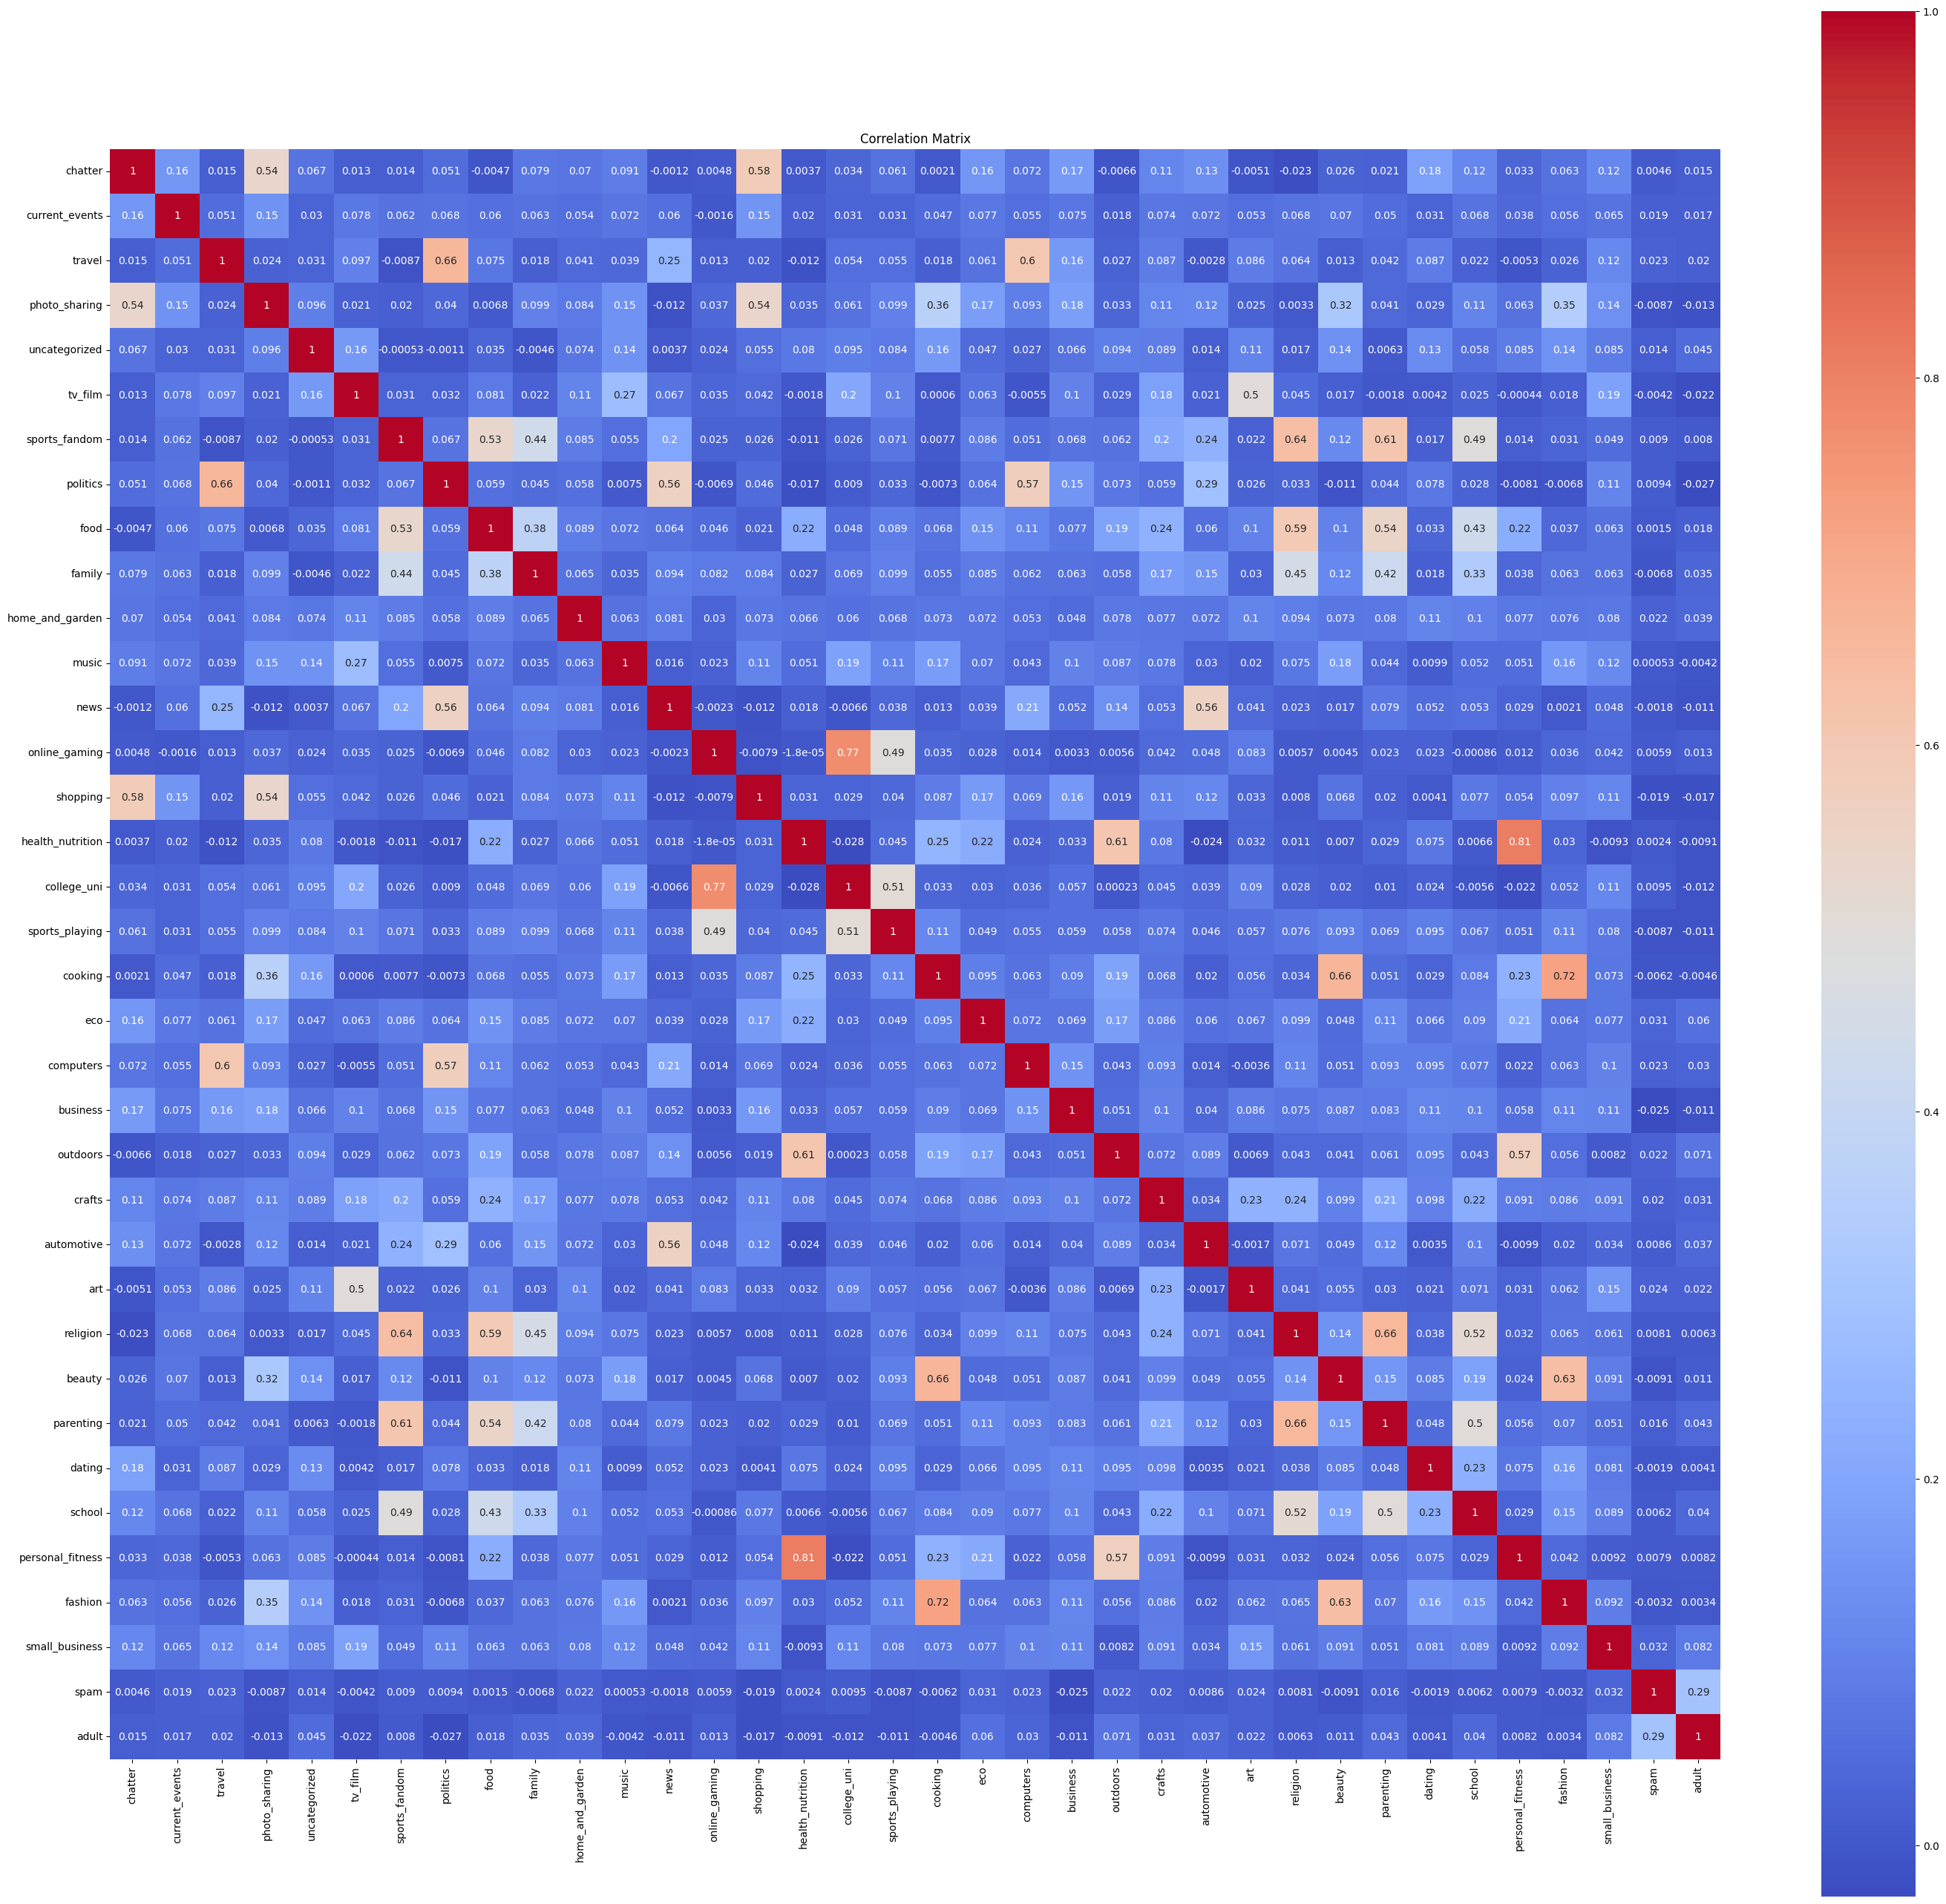

In [ ]:
# prompt: plot me a correlation matrix except user_id

import matplotlib.pyplot as plt
# Select only the numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(35,33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# prompt: get me the corrlarions between the colmns about 0.5 as threshold and print the values which are above the treshold only

# Set the correlation threshold
threshold = 0.4

# Iterate through the correlation matrix and print pairs with correlation above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) >= threshold:
            print(f"Correlation between = {correlation_matrix.columns[i]} & & {correlation_matrix.columns[j]}: {correlation:.2f}")


Correlation between = chatter & & photo_sharing: 0.54
Correlation between = chatter & & shopping: 0.58
Correlation between = travel & & politics: 0.66
Correlation between = travel & & computers: 0.60
Correlation between = photo_sharing & & shopping: 0.54
Correlation between = tv_film & & art: 0.50
Correlation between = sports_fandom & & food: 0.53
Correlation between = sports_fandom & & family: 0.44
Correlation between = sports_fandom & & religion: 0.64
Correlation between = sports_fandom & & parenting: 0.61
Correlation between = sports_fandom & & school: 0.49
Correlation between = politics & & news: 0.56
Correlation between = politics & & computers: 0.57
Correlation between = food & & religion: 0.59
Correlation between = food & & parenting: 0.54
Correlation between = food & & school: 0.43
Correlation between = family & & religion: 0.45
Correlation between = family & & parenting: 0.42
Correlation between = news & & automotive: 0.56
Correlation between = online_gaming & & college_uni: 0

In [ ]:
data.columns

Index(['user_id', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [ ]:
# from sklearn.preprocessing import StandardScaler
# # Define the columns for each score category with weights
# fitness_columns = {
#     'personal_fitness': 0.4,
#     'sports_playing': 0.3,
#     'outdoors': 0.2,
#     'health_nutrition': 0.1
# }

# general_health_columns = {
#     'cooking': 0.2,
#     'eco': 0.1,
#     'beauty': 0.15,
#     'fashion': 0.15,
#     'family': 0.2,
#     'religion': 0.2
# }

# # Calculate the weighted sum for Fitness Score
# data['Fitness_Score'] = sum(data[col] * weight for col, weight in fitness_columns.items())

# # Calculate the weighted sum for General Health Score
# data['General_Health_Score'] = sum(data[col] * weight for col, weight in general_health_columns.items())

# # Normalize the scores to have them on the same scale
# scaler = StandardScaler()
# data[['Fitness_Score', 'General_Health_Score']] = scaler.fit_transform(data[['Fitness_Score', 'General_Health_Score']])

# # Calculate the Out of Shape Score (inverse of Fitness Score)
# data['Out_of_Shape_Score'] = -data['Fitness_Score']

# # Display the calculated scores
# data[['user_id', 'Fitness_Score', 'General_Health_Score', 'Out_of_Shape_Score']].head(10)

In [ ]:
# # prompt: Identify meaningful combinations of categories or aggregate similar categories to simplify the analysis. and do some feature eng

# # Combine highly correlated categories
# data['Personal_Wellbeing'] = data['personal_fitness'] + data['health_nutrition']
# data['Social_Engagement'] = data['parenting'] + data['family']

# # Create a new feature indicating interest in both fashion and beauty
# data['Fashion_Beauty_Enthusiast'] = (data['fashion'] > 0) & (data['beauty'] > 0)

# # Create a feature for users interested in both cooking and healthy eating
# data['Healthy_Cook'] = (data['cooking'] > 0) & (data['health_nutrition'] > 0)

# # Display the updated data with new features
# data.head()


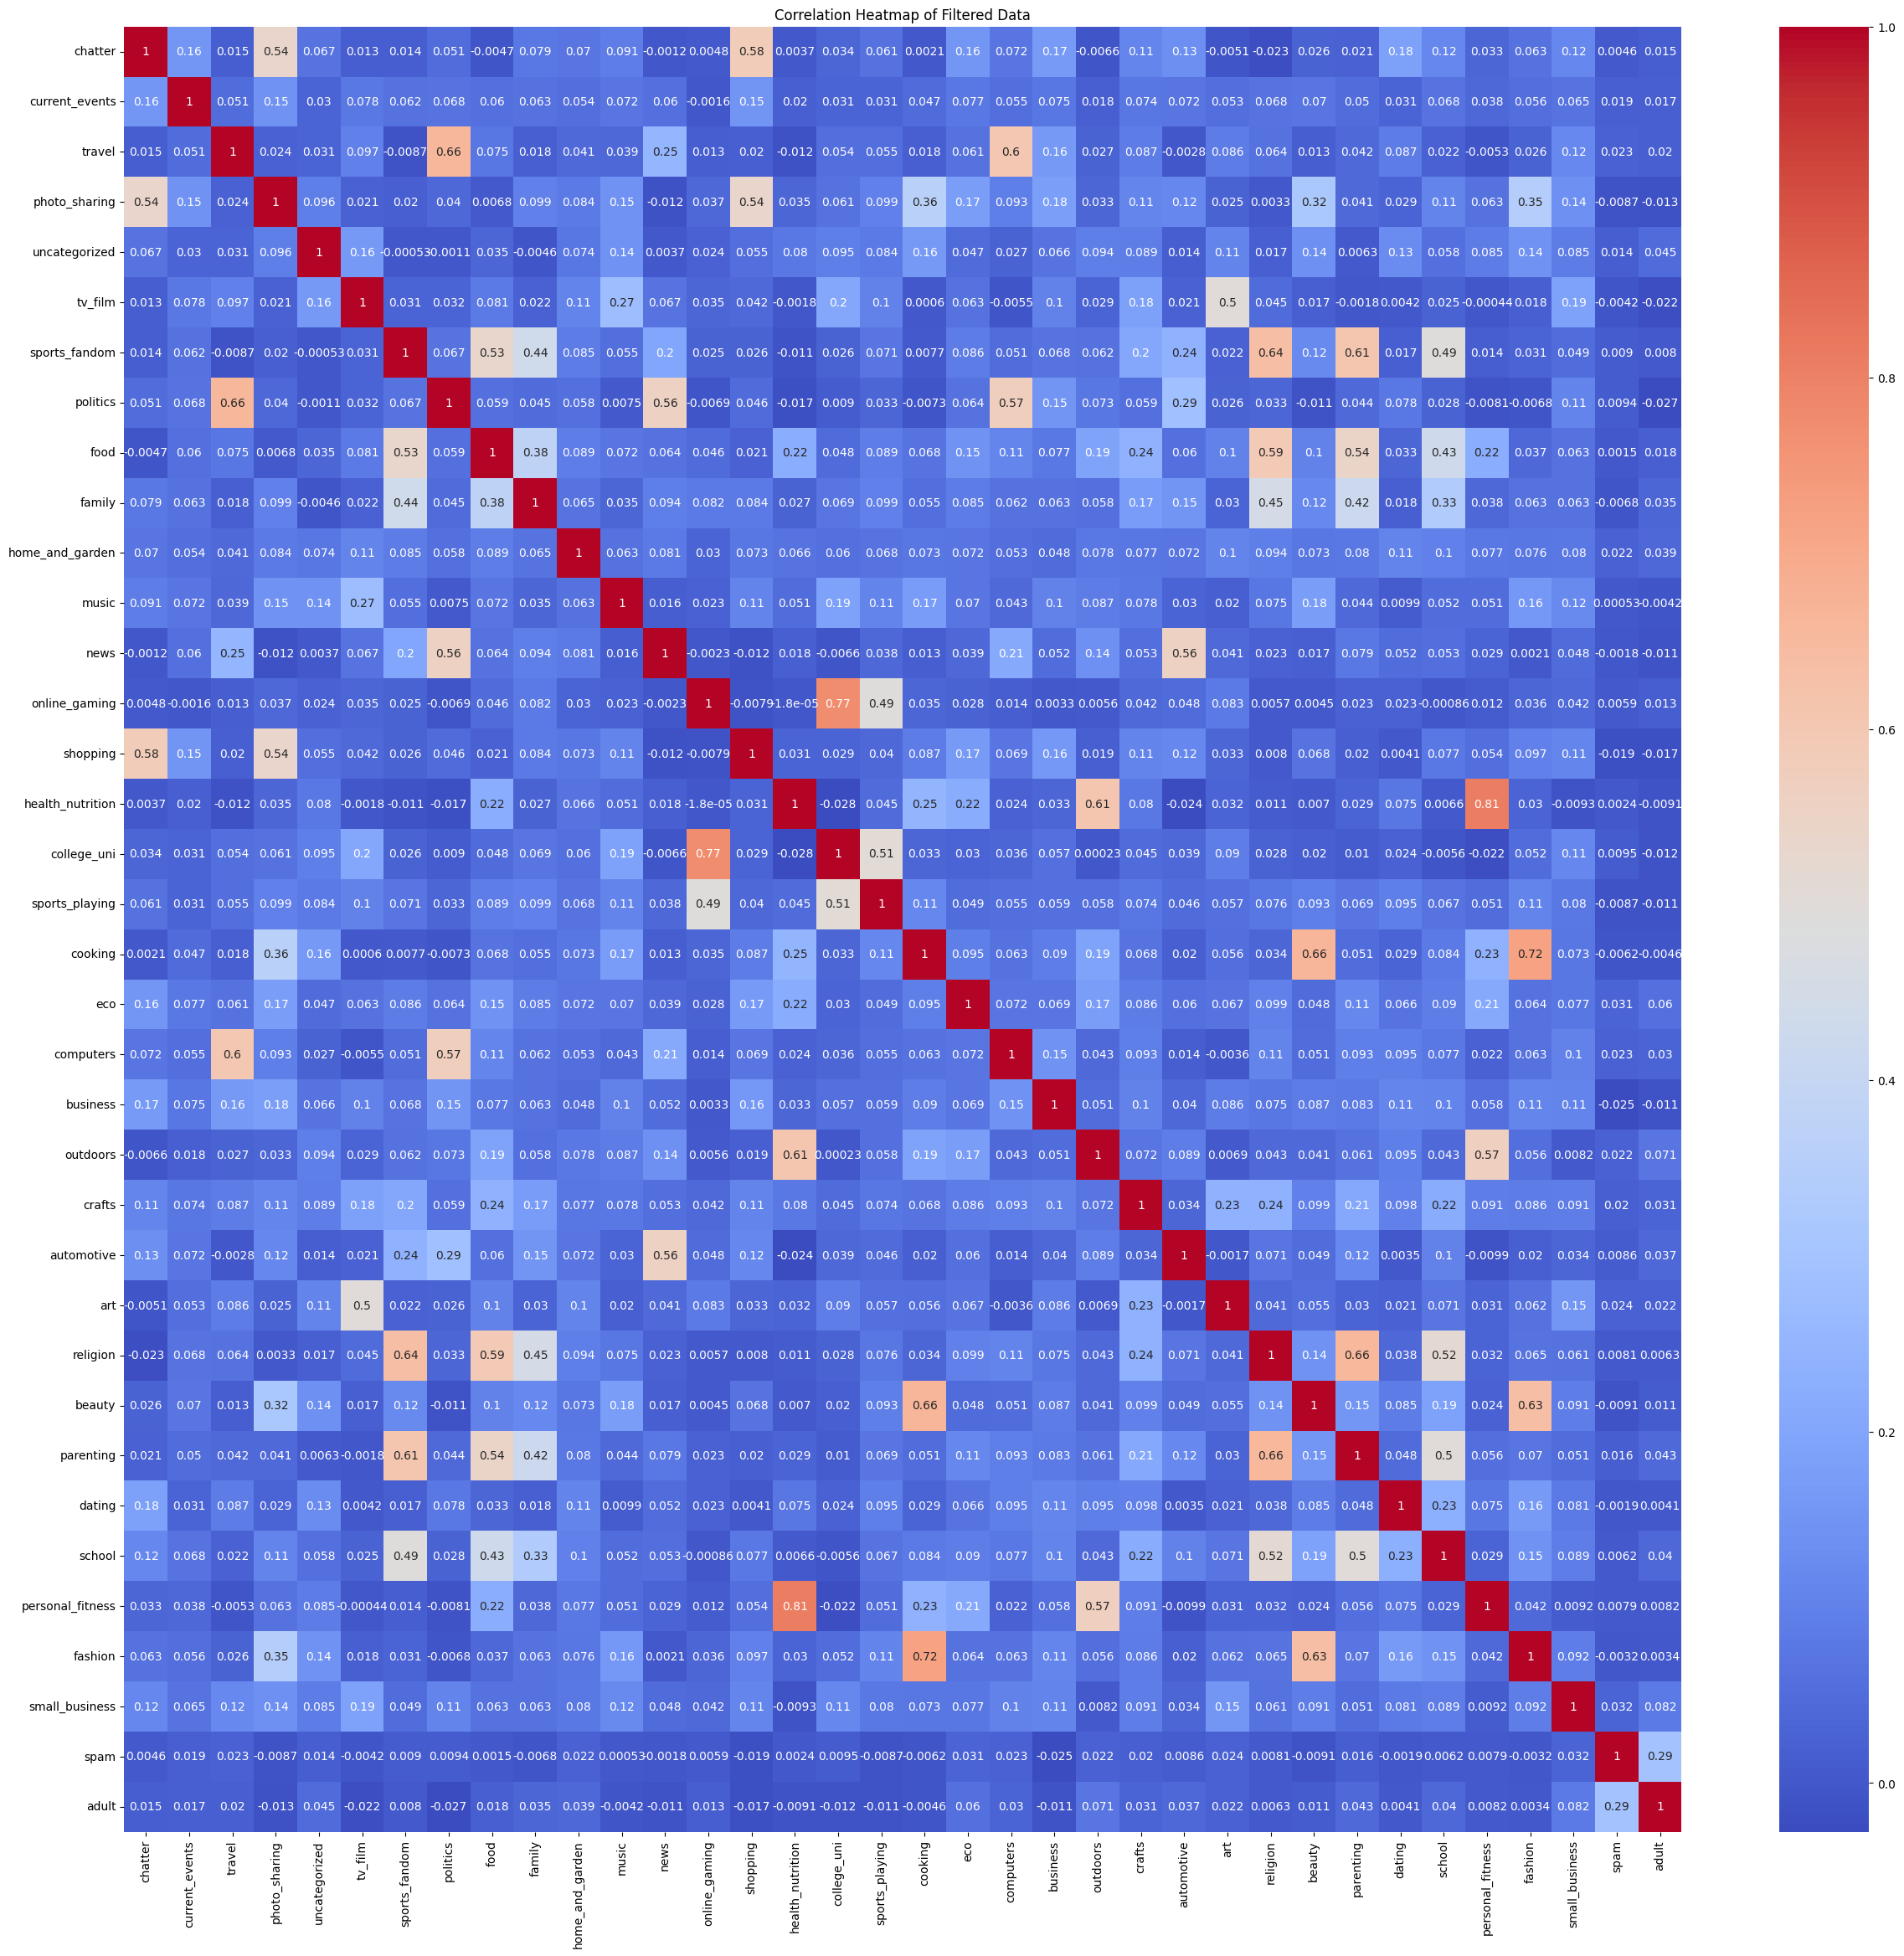

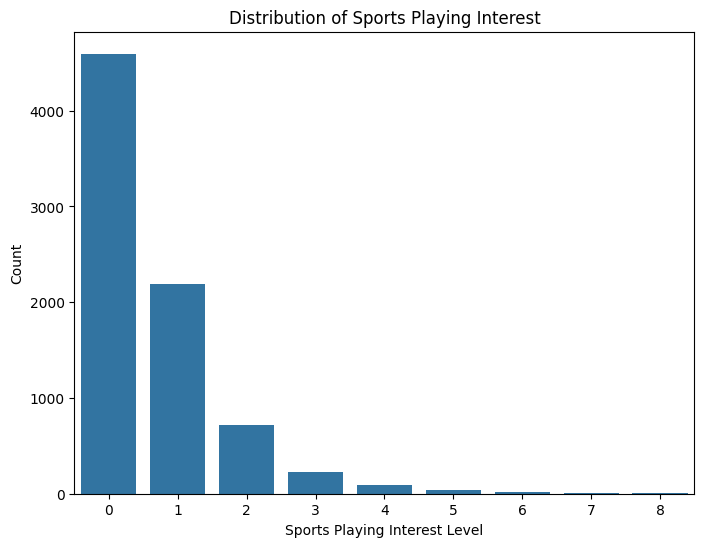

In [ ]:
# prompt: use heatmaps, bar charts, or dimensionality reduction techniques (like PCA) to visualize the data and find patterns

# Heatmap for correlation
plt.figure(figsize=(30, 28))
# Select only the numeric columns for correlation analysis
numeric_data2 = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Filtered Data')
plt.show()

# Bar chart for distribution of a specific feature (e.g., 'sports_playing')
plt.figure(figsize=(8, 6))
sns.countplot(x='sports_playing', data=data)
plt.title('Distribution of Sports Playing Interest')
plt.xlabel('Sports Playing Interest Level')
plt.ylabel('Count')
plt.show()


## PCA

In [ ]:
data_for_pca = data.drop(columns=['user_id'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

In [ ]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio to determine how many components to retain
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})

# Display the explained variance
print(explained_variance_df)

   Principal Component  Explained Variance Ratio
0                  PC1                  0.122307
1                  PC2                  0.082902
2                  PC3                  0.076735
3                  PC4                  0.067790
4                  PC5                  0.059786
5                  PC6                  0.050694
6                  PC7                  0.044811
7                  PC8                  0.038452
8                  PC9                  0.035862
9                 PC10                  0.030904
10                PC11                  0.027339
11                PC12                  0.025340
12                PC13                  0.024991
13                PC14                  0.024173
14                PC15                  0.023553
15                PC16                  0.022755
16                PC17                  0.021991
17                PC18                  0.019929
18                PC19                  0.018869
19                PC

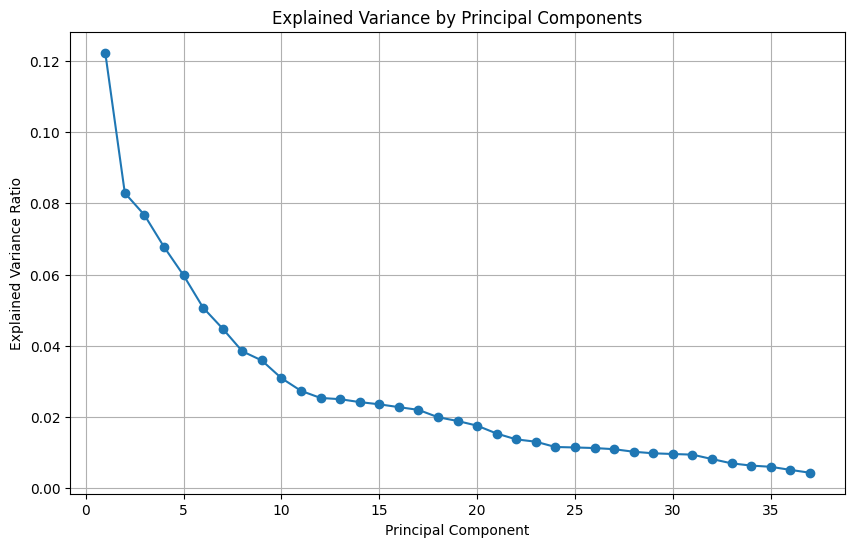

In [ ]:
# Plot the explained variance to help decide the number of components to retain
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

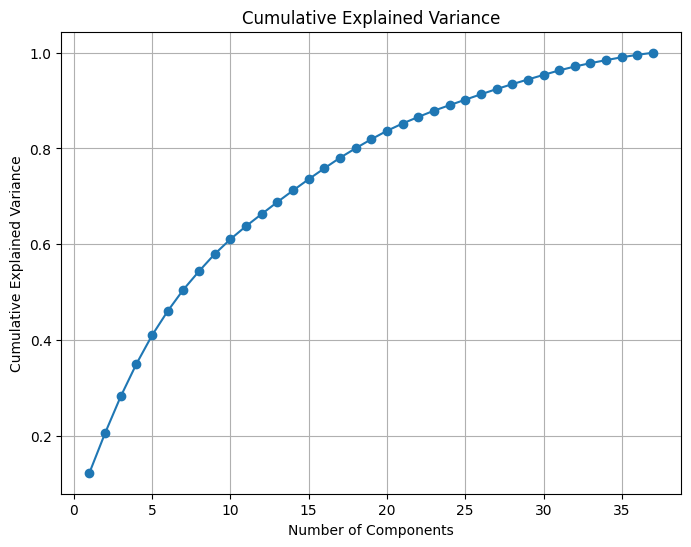

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
eigenvalues = pca.explained_variance_
n_components_kaiser = sum(eigenvalues > 1)
print(f'Number of components selected using Kaiser Criterion: {n_components_kaiser}')

Number of components selected using Kaiser Criterion: 11


In [ ]:
cumulative_variance_90 = cumulative_variance[cumulative_variance <= 0.90]
n_components_90 = len(cumulative_variance_90)
print(f'Number of components to explain 90% of variance: {n_components_90}')

Number of components to explain 90% of variance: 24


In [ ]:
# Retain only the first few components that capture the majority of the variance
n_components = 2 # Example: Retain the first 2 components
pca = PCA(n_components=n_components)
pca_result_reduced = pca.fit_transform(data_scaled)

# Convert the result into a DataFrame
pca_df = pd.DataFrame(data=pca_result_reduced, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
pca_df.head()

PC1       PC2
0  0.688406  4.325281
1  0.352318  0.666162
2  0.202404 -1.211751
3 -1.402850 -0.348546
4 -1.558578 -1.224854

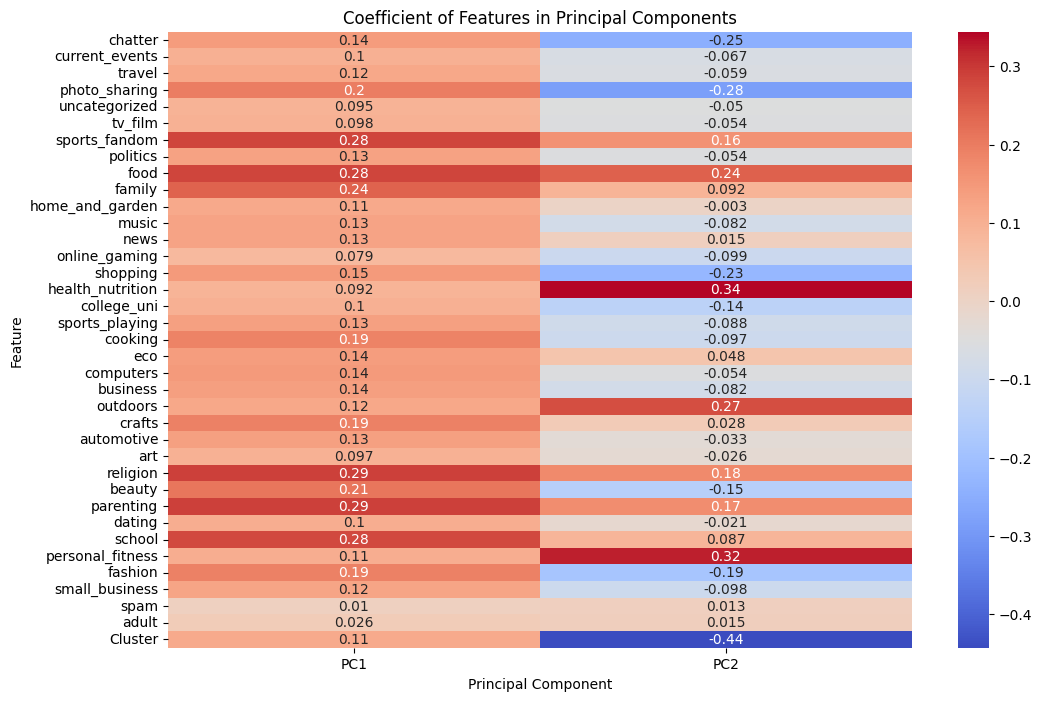

In [ ]:
# prompt: [plot me the coeffient for the each features in each pea_df

import pandas as pd
import matplotlib.pyplot as plt
# Get the component loadings (coefficients)
loadings = pca.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components)], index=data_for_pca.columns)

# Plot the coefficients for each feature in each principal component
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Coefficient of Features in Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()


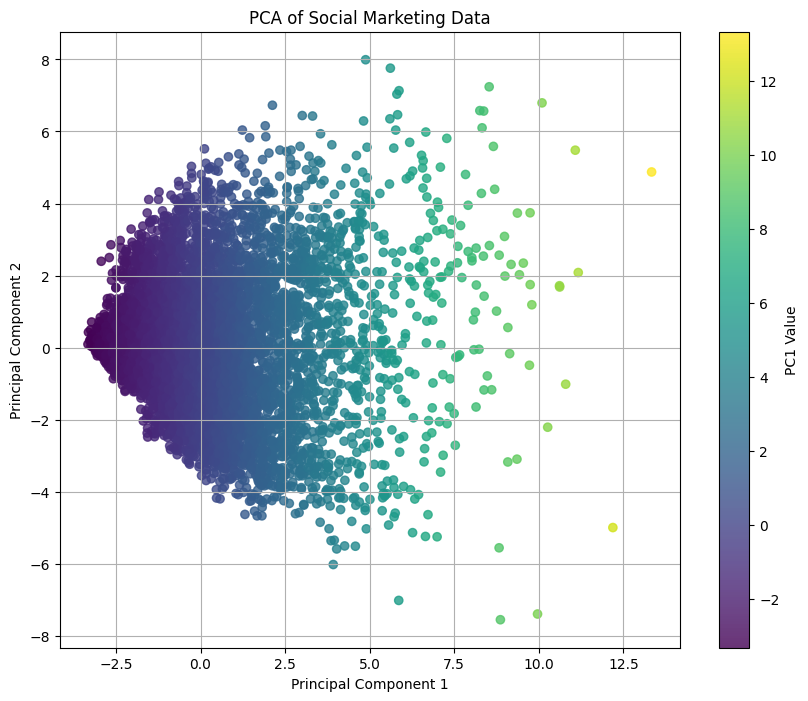

In [ ]:
# Assuming pca_df is your DataFrame with PCA results
plt.figure(figsize=(10, 8))

# Color coding based on 'PC1' values using a colormap
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PC1'], cmap='viridis', alpha=0.8)

plt.title('PCA of Social Marketing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='PC1 Value')  # Adding a colorbar to show the scale
plt.grid(True)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)  # data_scaled is the standardized data

# Convert the result into a DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])



KeyboardInterrupt: 

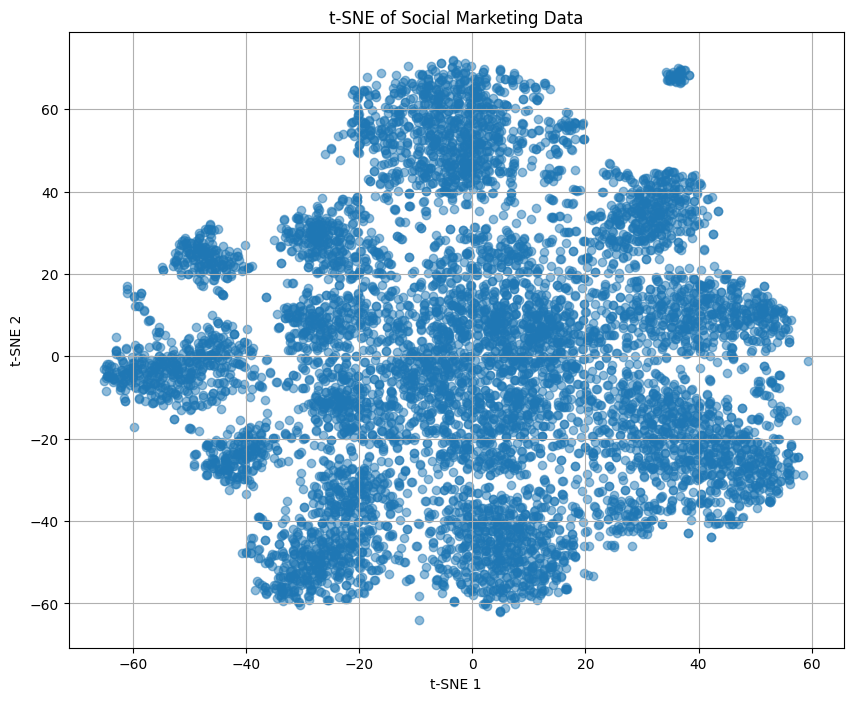

In [ ]:
# Plot the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], alpha=0.5)
plt.title('t-SNE of Social Marketing Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

In [ ]:
# ## multi color proff code
# # Apply t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, verbose = 1)
# tsne_result = tsne.fit_transform(data_scaled)  # data_scaled is the standardized data

# # Convert the result into a DataFrame
# tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])

# # Plot the t-SNE result
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], alpha=0.5)
# plt.title('t-SNE of Social Marketing Data')
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.grid(True)
# plt.show()

In [ ]:
# # Load the 20 Newsgroups dataset
# newsgroups = fetch_20newsgroups(subset='all')

# # Vectorize the data using TF-IDF
# vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# vectors = vectorizer.fit_transform(newsgroups.data)

# # 1000 features
# print(f"Shape of the TF-IDF matrix: {vectors.shape}")

In [ ]:
# # Perform PCA to reduce dimensionality before t-SNE
# pca = PCA(n_components=50)
# vectors_pca = pca.fit_transform(vectors.toarray())  # toarray to create a dense matrix from a sparse one
# vectors_pca.shape

In [ ]:
# # Perform PCA to reduce dimensionality before t-SNE
# pca = PCA(n_components=50)
# vectors_pca = pca.fit_transform(vectors.toarray())  # toarray to create a dense matrix from a sparse one
# vectors_pca.shape

In [ ]:
# # Create labels for visualization
# labels = [newsgroups.target_names[i] for i in newsgroups.target]

# # Use t-SNE to reduce dimensionality to D=2 for visualization
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
# vectors_tsne = tsne.fit_transform(vectors_pca)

# # Create a DataFrame for visualization
# df_tsne = pd.DataFrame(vectors_tsne, columns=["Component 1", "Component 2"])
# df_tsne['Label'] = labels

In [ ]:
# # just a helper functon for plotting
# def plot_tsne(color=df_tsne.columns):
#     fig = px.scatter(df_tsne, x="Component 1", y="Component 2", color=color, title="t-SNE visualization of 20 Newsgroups dataset")
#     fig.update_layout(autosize=False, width=1000, height=1000)
#     fig.show()

# # obviously a big muddle in the middle but some clear clustering structure!
# plot_tsne("Label")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

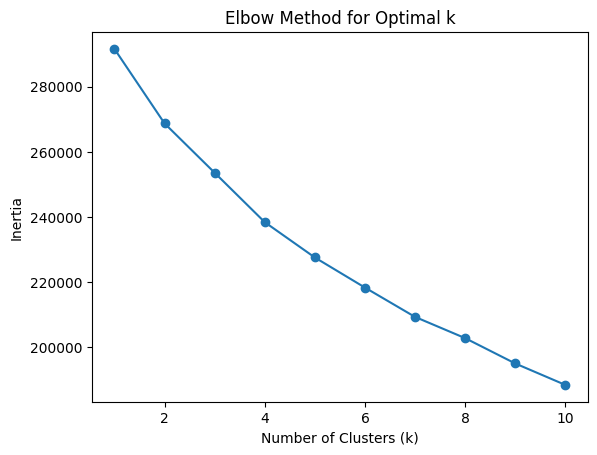

In [ ]:
# prompt: use k means for the data df and use the methid to have an optimal K

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame, select only numeric columns
data_for_kmeans  = data.drop(columns=['user_id'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_kmeans)

# Use the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

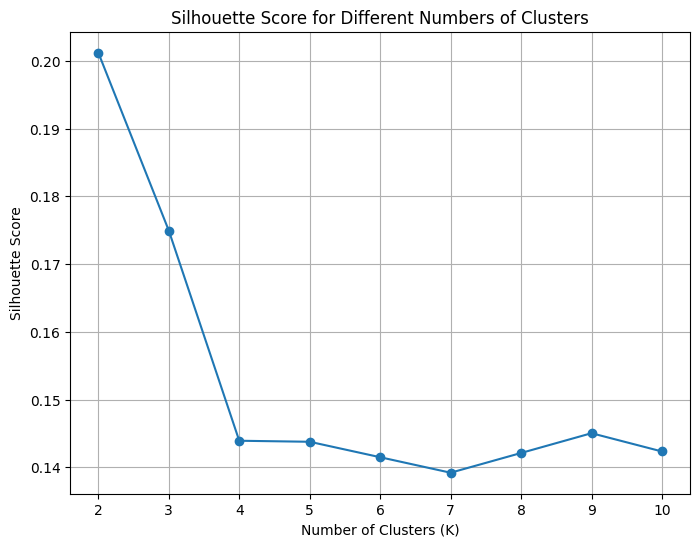

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of clusters to try
range_n_clusters = range(2, 11)
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# optimal K = 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

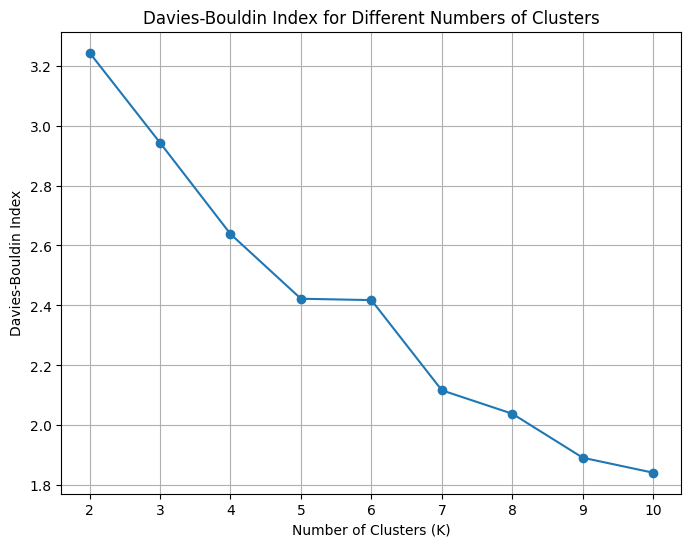

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    db_scores.append(davies_bouldin_score(data_scaled, cluster_labels))

# Plot the Davies-Bouldin index
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



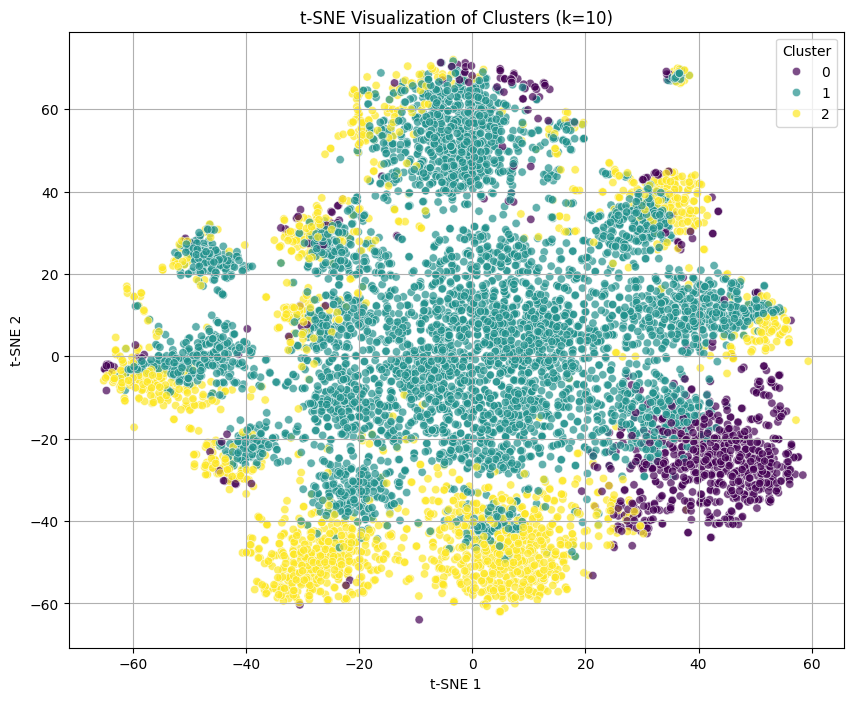

In [ ]:
# prompt: plot me the kmeans for k = 10

import matplotlib.pyplot as plt
# Apply K-means with k=10
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Add the cluster labels to the t-SNE DataFrame for visualization
tsne_df['Cluster'] = labels

# Plot the t-SNE results with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Clusters (k=10)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


In [ ]:
# Step 3: Choose the optimal number of clusters (e.g., k=3 based on the elbow plot)
optimal_k = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_for_kmeans)

# Step 4: Analyzing the clusters
# Calculate the mean values for each cluster to understand the characteristics of each group
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_analysis = data[numeric_columns].groupby('Cluster').mean()
print(cluster_analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



          chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        4.216418        1.544776  1.523217       2.712272       0.964345   
1        3.085821        1.396144  1.480100       1.571310       0.696725   
2        7.937365        1.853132  1.898488       5.618251       1.017279   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        1.082919       1.475954  1.648425  2.191542  0.909619  ...  1.086235   
1        1.008085       1.468905  1.614842  1.141791  0.735489  ...  0.978441   
2        1.224082       1.996760  2.332613  1.546436  1.168467  ...  1.406048   

           beauty  parenting    dating    school  personal_fitness   fashion  \
Cluster                                                                        
0        0.665837   0.978441  1.029851  0.744610

                Cluster 0  Cluster 1  Cluster 2
chatter          4.216418   3.085821   7.937365
current_events   1.544776   1.396144   1.853132
travel           1.523217   1.480100   1.898488
photo_sharing    2.712272   1.571310   5.618251
uncategorized    0.964345   0.696725   1.017279


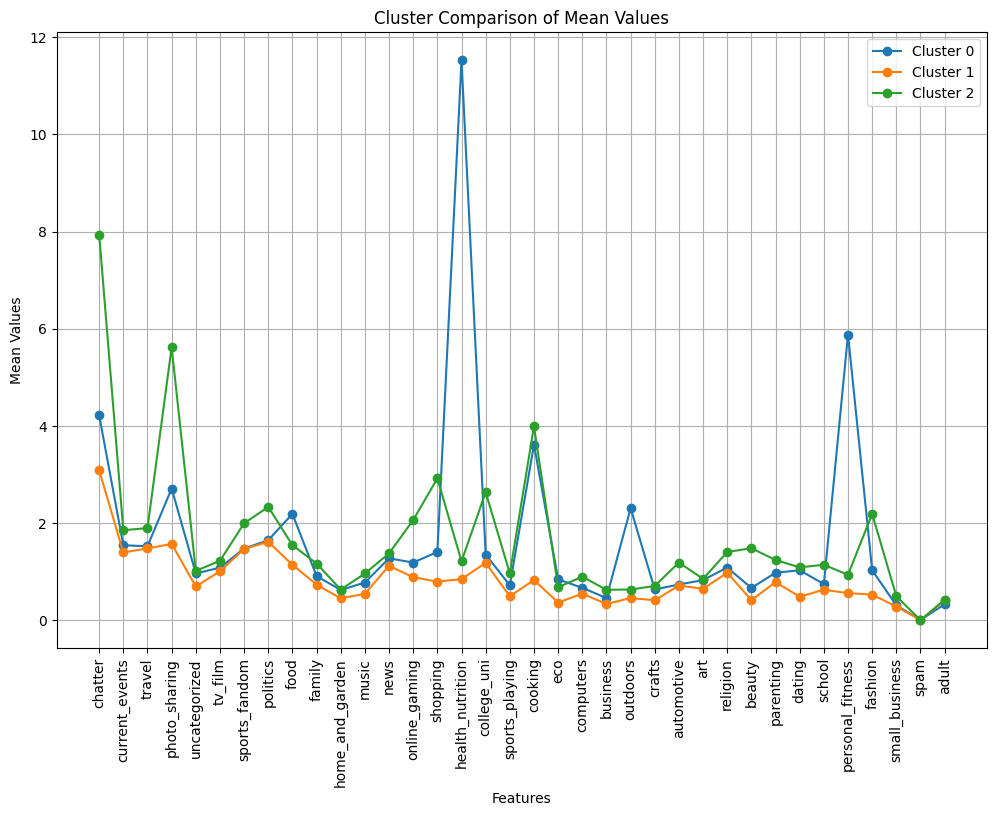

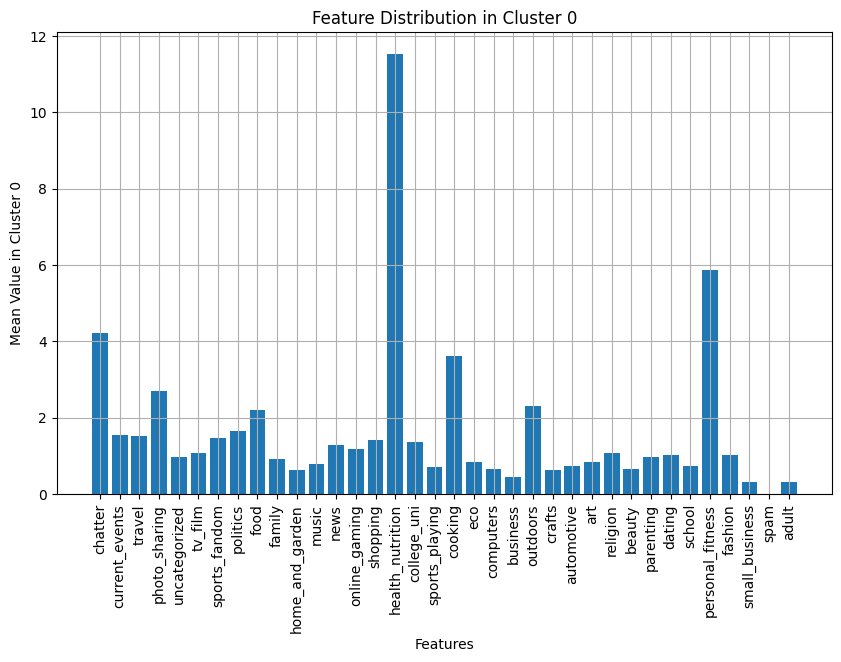

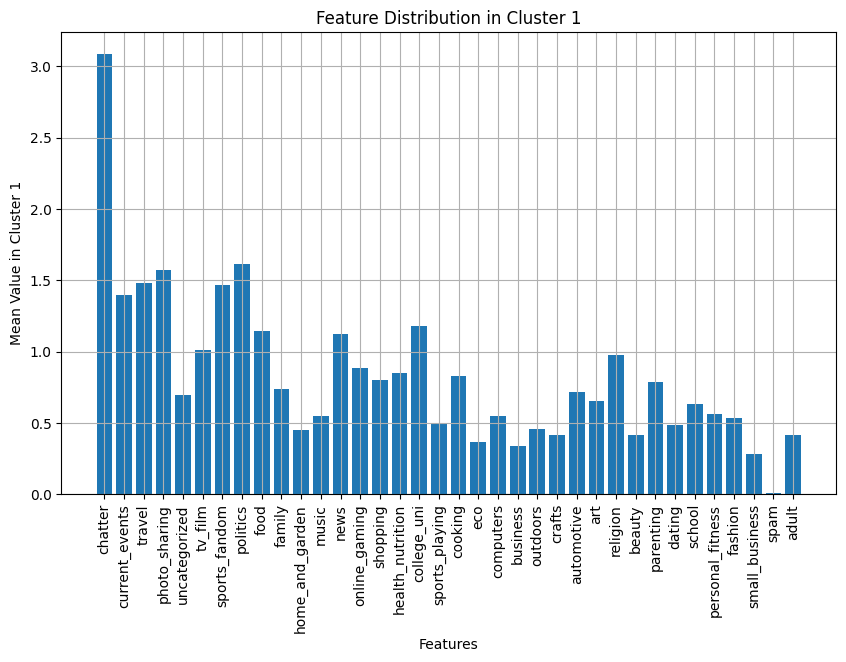

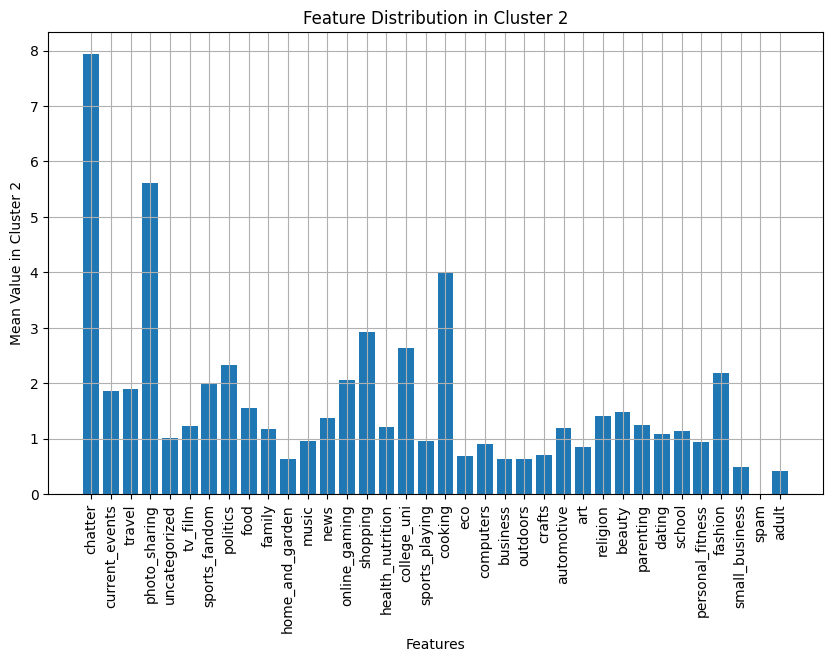

In [ ]:
cluster_analysis_t = cluster_analysis.T
cluster_analysis_t.columns = [f'Cluster {i}' for i in range(len(cluster_analysis_t.columns))]
print(cluster_analysis_t.head())

# Step 3: Compare Clusters
# Plotting the mean values for each feature across clusters
plt.figure(figsize=(12, 8))
for col in cluster_analysis_t.columns:
    plt.plot(cluster_analysis_t.index, cluster_analysis_t[col], marker='o', label=col)

plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('Cluster Comparison of Mean Values')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Check for Overlap
# You can visually inspect the plot to see if the clusters have similar or distinct characteristics

# Additional Analysis: Visualizing individual clusters
# If needed, you can also create bar charts for individual clusters

for i, col in enumerate(cluster_analysis_t.columns):
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_analysis_t.index, cluster_analysis_t[col])
    plt.xlabel('Features')
    plt.ylabel(f'Mean Value in {col}')
    plt.title(f'Feature Distribution in {col}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()